This work was done by YK and PM.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import networkx.algorithms.community as nxcom

# A04.1 Community detection

In [2]:
# Read the datasets
import os

def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        allFiles.append(entry)
    return allFiles

myfiles = getListOfFiles('./data-assignment4-update')
myfiles

['graph_dolphins.gml', 'graph_jazz_collab.gml', 'graph_karate.gml']

In [56]:
def find_communities(graph, title):
    # Generate a randomised network
    grnd = nx.algorithms.smallworld.random_reference(graph, connectivity=False)
    # (a) greedy modularity maximisation by Clauset Newman
    # randomised
    comm_rnd = nxcom.greedy_modularity_communities(grnd)
    # original
    comm = nxcom.greedy_modularity_communities(graph)
    for i in range(len(comm)):
        comm[i] = sorted(comm[i])
    # position of nodes
    pos = nx.spring_layout(graph)

    # Assign to each community a colour and draw the resulting graph
    values = {n: i for i, ns in enumerate(comm) for n in ns}
    n_colour = np.asarray([values[n] for n in graph.nodes()])


    # (b) Girvan-Newman
    # randomised
    comm_gn_rnd = nxcom.girvan_newman(grnd)
    lst_rnd = []
    for x in comm_gn_rnd:
        lst_rnd.append(list(x))
    modularity_rnd = []
    for x in lst_rnd:
        modularity_rnd.append(nxcom.modularity(grnd, x))
    max_idx_rnd = np.argmax(modularity_rnd)

    # original
    comm_gn = nxcom.girvan_newman(graph)
    lst = []
    for x in comm_gn:
        lst.append(list(x))
    # Extract the community with the maximum modularity
    modularity = []
    for x in lst:
        modularity.append(nxcom.modularity(graph, x))
    max_idx = np.argmax(modularity)

    values_gn = {n: i for i, ns in enumerate(lst[max_idx]) for n in ns}
    colour_map = np.asarray([values_gn[n] for n in graph.nodes()])

    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
    # Draw the graph for the Clauset Newman algorithm
    nx.draw(graph, pos, node_color=n_colour, ax = ax1)
    ax1.set_title('Clauset Newman and Moore: ' + title.split('.')[0])
    print('Clauset Newman and Moore: Before randomisation, the number of communities = {}. After radomisation = {}'.format(len(comm), len(comm_rnd)))

    # Draw the graph for the Girvan-Newman algorithm
    nx.draw(graph, pos, node_color=colour_map, ax = ax2)
    ax2.set_title('Girvan-Newman: ' + title.split('.')[0])
    print('Girvan-Newman: Before randomisation, the number of communities = {}. After radomisation = {}'.format(len(lst[max_idx]), len(lst_rnd[max_idx_rnd])))

    plt.show()

Clauset Newman and Moore: Before randomisation, the number of communities = 4. After radomisation = 5
Girvan-Newman: Before randomisation, the number of communities = 5. After radomisation = 29


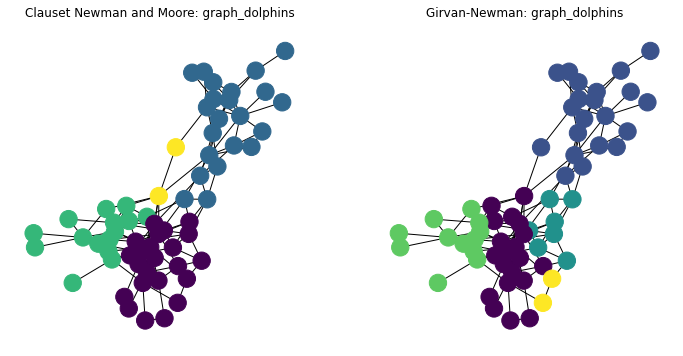

Clauset Newman and Moore: Before randomisation, the number of communities = 4. After radomisation = 4
Girvan-Newman: Before randomisation, the number of communities = 39. After radomisation = 133


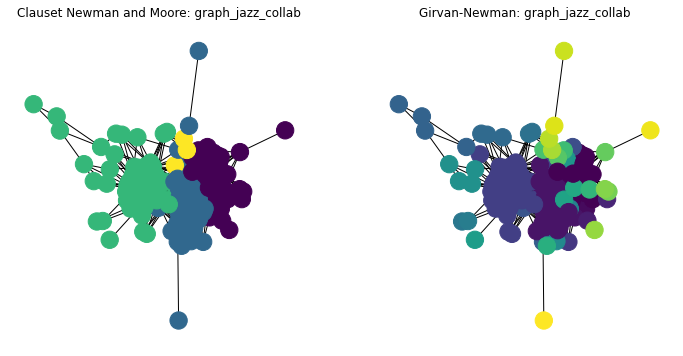

Clauset Newman and Moore: Before randomisation, the number of communities = 3. After radomisation = 4
Girvan-Newman: Before randomisation, the number of communities = 5. After radomisation = 10


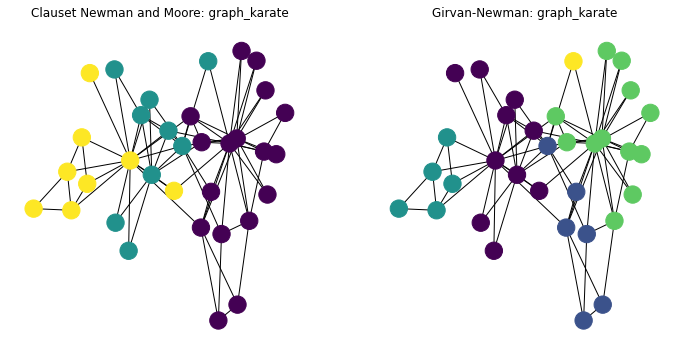

In [57]:
# Randomise each network & compare the # of communities obtained before and after randomisation
for i in range(len(myfiles)) :
    # Read a file
    g = nx.read_gml('./data-assignment4-update/' + myfiles[i])
    # (a) the greedy modularity maximisation by Clauset Newman & Moore
    # (b) the Girvan-Newman algorithm
    find_communities(g, myfiles[i])

# A04.2 Random Graphs

Task: Generate three Erdos Renyi networks with N = 500 nodes & average degree \<k>

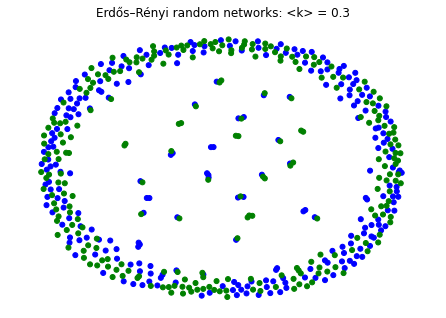

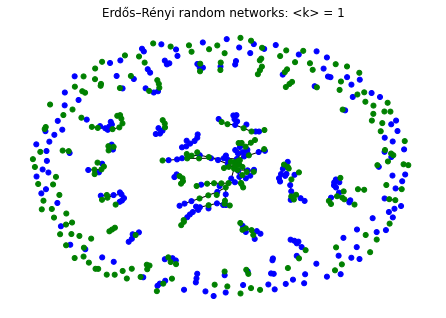

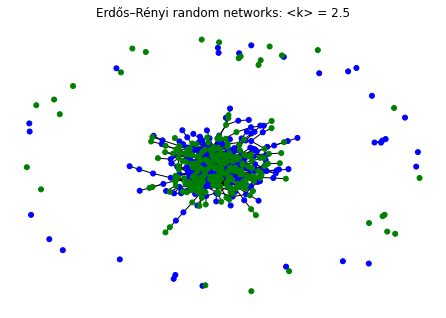

In [5]:
N = 500
k = [0.3, 1, 2.5]
g1 = nx.erdos_renyi_graph(N, k[0]/(N-1))
g2 = nx.erdos_renyi_graph(N, k[1]/(N-1))
g3 = nx.erdos_renyi_graph(N, k[2]/(N-1))
networks = [g1, g2, g3]

for i in range(len(networks)) :
    num = len(networks[i].nodes)
    g = networks[i]
    
    color_map=[]
    for node in g:
        if node < num/2:
            color_map.append('blue')
        else:
            color_map.append('green')    
    
    pos = nx.spring_layout(g)
    nx.draw(networks[i], node_color=color_map, pos=pos, node_size = 25)
    plt.title('Erdős–Rényi random networks: <k> = ' + str(k[i]))

    plt.show()

Task: Generate ER graphs with N = 200 nodes for different edge creation probabilities p in [0,1]

Text(0, 0.5, 'Average clustering <C>')

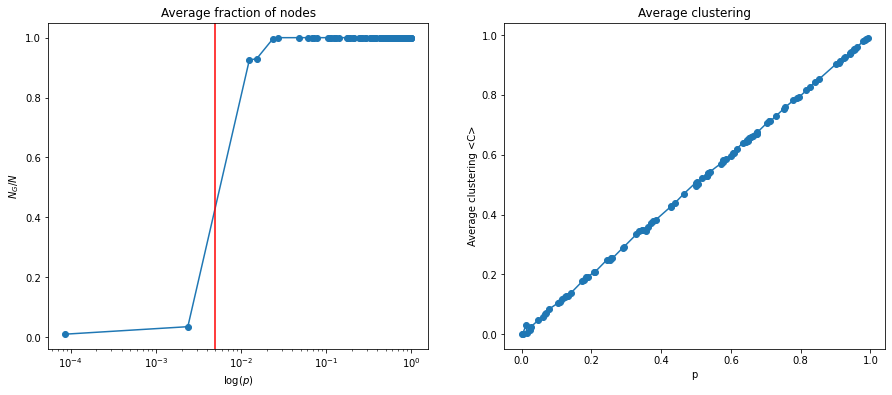

In [8]:
n = 200 # nodes
gen_num = 100 # the # for generating graphs 
p = sorted(np.random.rand(gen_num)) # p in [0,1]
connect = np.zeros(gen_num)
avg_c = np.zeros(gen_num)

for i in range(gen_num):
    # Generate an ER graph
    g = nx.erdos_renyi_graph(n, p[i])
    components = [c for c in nx.connected_components(g)]
    # NG = size of the largest connected component
    maxcomp = max(components, key=len)
    # NG/N = function of average degree <k>
    connect[i] = len(maxcomp)/g.number_of_nodes()
    # average clustering C
    avg_c[i] = nx.average_clustering(g)


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 6))
# 1. Plot the average fraction of nodes in the largest connected component <NG/N> as a function of p and mark with a vertical line the critical probability pc = 1/N
ax1.plot(p, connect, marker = 'o')
ax1.set_title('Average fraction of nodes')
ax1.set_xscale('log')
ax1.set_ylabel(r'$N_G/N$')
ax1.set_xlabel(r'$\log(p)$')
ax1.axvline(1/n, color = 'r', label = 'critical probability')

# 2. Plot the average clustering C as a function of p and give an interpretation of the result
ax2.plot(p, avg_c, marker = 'o')
ax2.set_title('Average clustering')
ax2.set_xlabel('p') 
ax2.set_ylabel('Average clustering <C>')

In ER graphs for the average clustering \<C>, one can observe that the graph is linear. It implies that the probability of connecting two of its neighbours is the same as the probability of connecting any other two nodes. Therefore, if the probability of creating edges increases, it would increase the likelihood of connecting two neighbour nodes.

# A04.3 Small-world with high clustering

In [3]:
probabilities = 10**(np.arange(-4.0,0.01,0.1))

N = 150
k = 6

cl_cl0 = []
Dp_D0 = []


def cp_formula(k, p):
    return (3/2 * (k - 1)/(2*k - 1) * (1 - p)**3)


for i in range(len(probabilities)):
    p = probabilities[i]
    
    Dp_total = 0
    D0_total = 0
    
    cl_total = 0
    cl0_total = 0
    
    for j in range (0, 100):
        rnd_seed = np.random
        graph = nx.watts_strogatz_graph(N, k, p, seed = rnd_seed)
        ctrl_graph = nx.watts_strogatz_graph(N, k, 0, seed = rnd_seed)
        
        Dp_total = Dp_total + nx.average_shortest_path_length(graph)
        D0_total = D0_total + nx.average_shortest_path_length(ctrl_graph)
        
        cl_total = cl_total + nx.average_clustering(graph)
        cl0_total = cl0_total + nx.average_clustering(ctrl_graph) 
    
    Dp_average = Dp_total/N
    D0_average = D0_total/N
    D_p_to_D_0 = Dp_average/D0_average
    Dp_D0.append(D_p_to_D_0)
    
    cl_average = cl_total/N
    cl0_average = cl0_total/N
    cl_to_cl0 = cl_average/cl0_average
    cl_cl0.append(cl_to_cl0)
    
    cl_calc = cp_formula(k, p)
    
    print("p:", p, ", graph clustering:", cl_average, ", analytical result:", cl_calc)
    

p: 0.0001 , graph clustering: 0.3999492063492062 , analytical result: 0.6816136568175
p: 0.00012589254117941674 , graph clustering: 0.399913439153439 , analytical result: 0.6815607067644969
p: 0.00015848931924611142 , graph clustering: 0.3998833862433861 , analytical result: 0.6814940504965047
p: 0.0001995262314968881 , graph clustering: 0.39975534391534373 , analytical result: 0.6814101414066254
p: 0.0002511886431509582 , graph clustering: 0.3997597883597882 , analytical result: 0.6813045159149327
p: 0.00031622776601683826 , graph clustering: 0.3994770370370368 , analytical result: 0.6811715568206773
p: 0.00039810717055349773 , graph clustering: 0.3993153439153437 , analytical result: 0.6810041958362736
p: 0.000501187233627273 , graph clustering: 0.39933396825396805 , analytical result: 0.6807935398221512
p: 0.0006309573444801943 , graph clustering: 0.39934772486772474 , analytical result: 0.6805284013887836
p: 0.0007943282347242829 , graph clustering: 0.3990095238095237 , analytical 

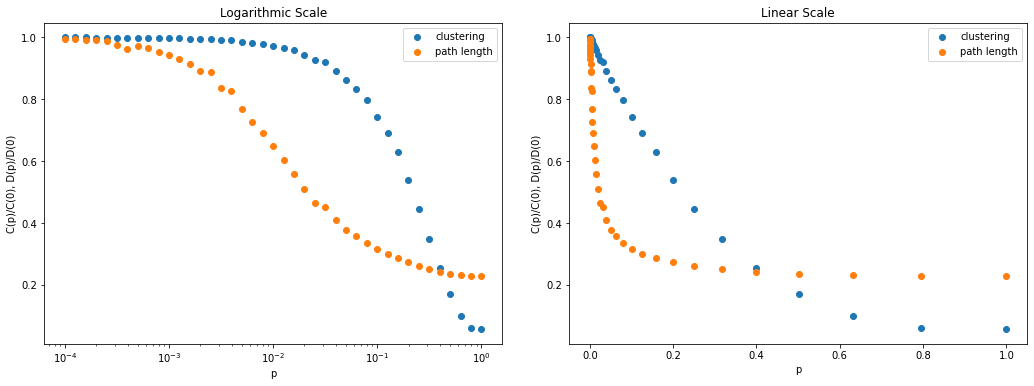

In [4]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.set_title('Logarithmic Scale')
ax1.set_xscale('log')
ax1.set_ylabel('C(p)/C(0), D(p)/D(0)')
ax1.set_xlabel('p')
ax1.scatter(probabilities, cl_cl0, label = "clustering")
ax1.scatter(probabilities, Dp_D0, label = "path length")
ax1.legend()

ax2.set_title('Linear Scale')
ax2.set_ylabel('C(p)/C(0), D(p)/D(0)')
ax2.set_xlabel('p')
ax2.scatter(probabilities, cl_cl0, label = "clustering")
ax2.scatter(probabilities, Dp_D0, label = "path length")
ax2.legend()
               
fig.tight_layout(pad=3.0)
plt.show()